<u><center><h1>HOMEWORK 2</h1></center></u>
<br></br>
<center> <h3>CS178</h3> </center>
<center> <h3>Jeremy Parnell (jmparnel)</h3> </center>
<br></br>

In [1]:
from __future__ import division
import numpy as np 
import mltools as ml

%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(0)

# Problem 1: Linear Regression

In [2]:
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the data 
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it's 2-dimensional 
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

## Problem 1.1

In [3]:
print "Xtr: " + str(Xtr.shape) + " Xte: " + str(Xte.shape) + " Ytr: " + str(Ytr.shape) + " Yte: " + str(Yte.shape)

Xtr: (60, 1) Xte: (20, 1) Ytr: (60,) Yte: (20,)


## Problem 1.2

In [4]:
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code) 
ys = lr.predict( xs ) # make predictions at xs

### Problem 1.2 - A

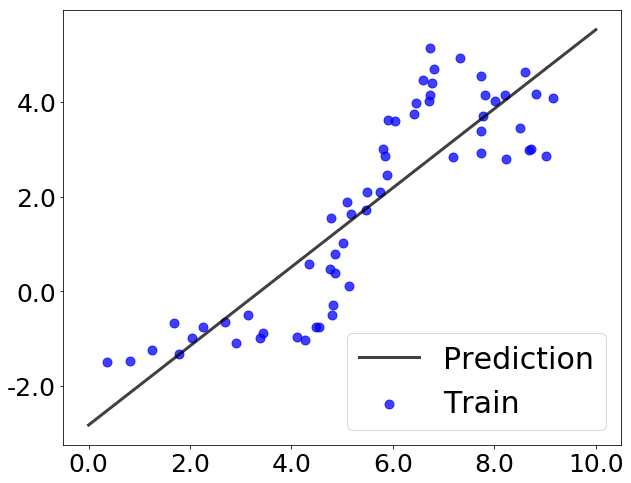

In [5]:
# Plotting the data
f, ax = plt.subplots(1, 1, figsize=(10, 8))
    
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')

ax.set_xticklabels(ax.get_xticks(), fontsize=25)
ax.set_yticklabels(ax.get_yticks(), fontsize=25) 

# Controlling the size of the legend and the location.
ax.legend(fontsize=30, loc=4)

plt.show()

### Problem 1.2 - B

In [6]:
print lr.theta
print
print "SLOPE: " + str(lr.theta[0][1])
print "Y-INTERCEPT: " + str(lr.theta[0][0])

[[-2.82765049  0.83606916]]

SLOPE: 0.836069160262
Y-INTERCEPT: -2.82765048766


<p><b>After observing my graph, the prediction function does indeed cross the y axis at -2.82765049, with a the slope moving upwards at a positive rate of 0.83606916.</b></p>

### Problem 1.2 - C

In [7]:
  def mse(y_true, y_hat):
    return np.mean((y_true - y_hat.reshape(y_true.shape))**2)

<p><b><u>MSE of training data:</u></b></p>

In [8]:
Ytrhat = lr.predict(Xtr)
mse(Ytr,Ytrhat)

1.1277119556093911

<p><b><u>MSE of test data:</u></b></p>

In [9]:
Ytehat = lr.predict(Xte)
mse(Yte,Ytehat)

2.2423492030101246

## Problem 1.3

In [10]:
Xtr2 = np.zeros( (Xtr.shape[0],2) ) # create Mx2 array to store features 
Xtr2[:,0] = Xtr[:,0] # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2 # place "x^2" feature as X2
# Now, Xtr2 has two features about each data point: "x" and "x^2"

### Problem 1.3 - A

In [11]:
def Phi(X):
    return ml.transforms.rescale( ml.transforms.fpoly(X,degree,False), params)[0]

def LinRegressTset(degree):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
    XsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,False), params)
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    
    YhatTrain = lr.predict( XtrP ) # predict on training data
    YhatTest  = lr.predict( XteP )
    yshat = lr.predict( XsP )
    return YhatTrain, YhatTest, yshat
    

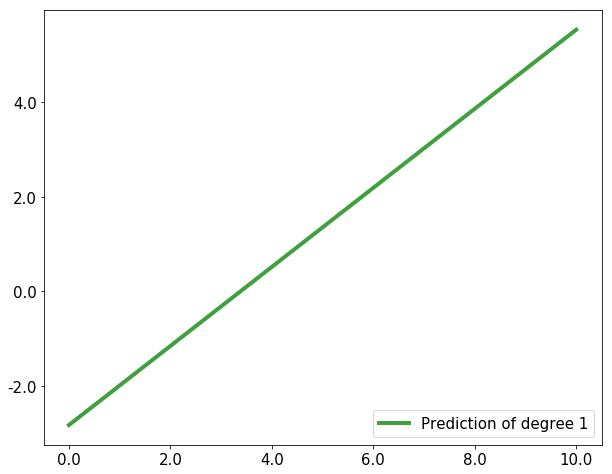

In [12]:
YhatTrain, YhatTest, yshat = LinRegressTset(1)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(xs, yshat, lw=4, color='green', alpha=0.75, label='Prediction of degree 1')
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   
ax.legend(fontsize=15, loc=4)
plt.show()

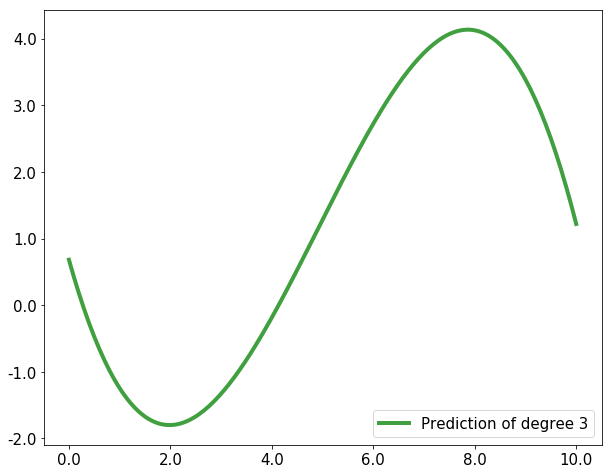

In [13]:
YhatTrain, YhatTest, yshat = LinRegressTset(3)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(xs, yshat, lw=4, color='green', alpha=0.75, label='Prediction of degree 3')
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   
ax.legend(fontsize=15, loc=4)
plt.show()

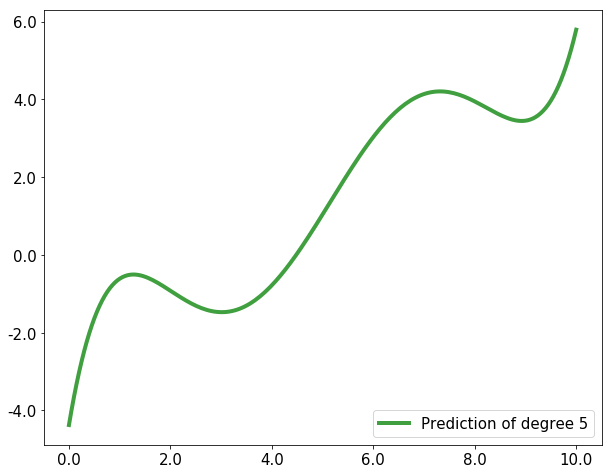

In [14]:
YhatTrain, YhatTest, yshat = LinRegressTset(5)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(xs, yshat, lw=4, color='green', alpha=0.75, label='Prediction of degree 5')
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   
ax.legend(fontsize=15, loc=4)
plt.show()

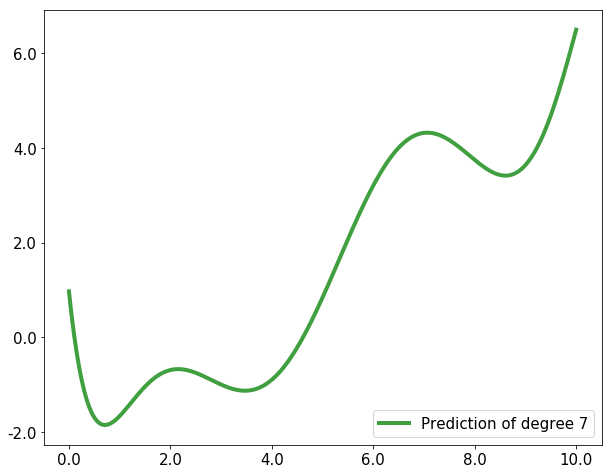

In [15]:
YhatTrain, YhatTest, yshat = LinRegressTset(7)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(xs, yshat, lw=4, color='green', alpha=0.75, label='Prediction of degree 7')
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   
ax.legend(fontsize=15, loc=4)
plt.show()

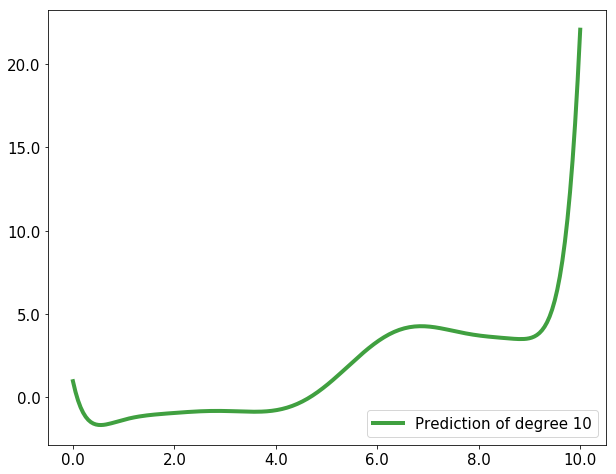

In [16]:
YhatTrain, YhatTest, yshat = LinRegressTset(10)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(xs, yshat, lw=4, color='green', alpha=0.75, label='Prediction of degree 10')
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   
ax.legend(fontsize=15, loc=4)
plt.show()

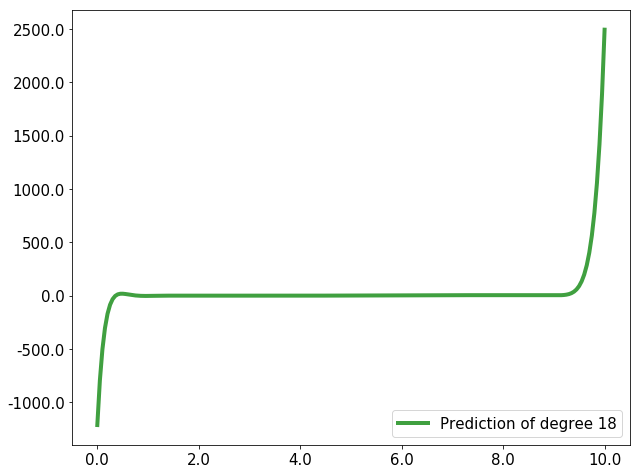

In [17]:
YhatTrain, YhatTest, yshat = LinRegressTset(18)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(xs, yshat, lw=4, color='green', alpha=0.75, label='Prediction of degree 18')
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   
ax.legend(fontsize=15, loc=4)
plt.show()

### Problem 1.3 - B

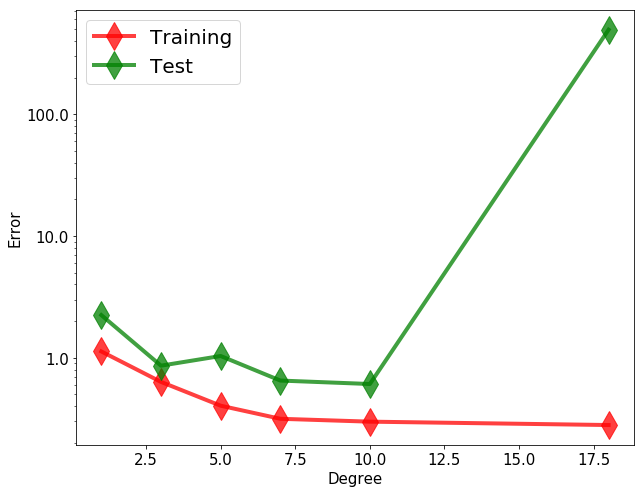

In [18]:
degrees = np.array([1, 3, 5, 7, 10, 18])
train_error = np.zeros(degrees.shape[0])
test_error = np.zeros(degrees.shape[0])
fig,ax=plt.subplots(1,1, figsize=(10, 8))

for i, degree in enumerate(degrees):
    YhatTrain, YhatTest, yshat = LinRegressTset(degree)
    train_error[i] = mse(Ytr, YhatTrain)
    test_error[i] = mse(Yte, YhatTest)
    
ax.semilogy(degrees,train_error,'r-',lw=4, marker='d', markersize=20, alpha=0.75, label='Training')
ax.semilogy(degrees,test_error,'g-',lw=4, marker='d', markersize=20, alpha=0.75, label='Test')
ax.set_xlabel('Degree',fontsize=15)
ax.set_ylabel('Error',fontsize=15)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   

ax.legend(fontsize=20, loc=0)
plt.show() 

### Problem 1.3 - C

<p><b>Recommended Degree: <u>10</u></b></p>

# Problem 2: Cross Validation

In [19]:
def Crossvalidation(degree, nFolds):
    J = np.zeros(nFolds)
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP,params = ml.transforms.rescale(XtiP)       
        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi,degree,False), params)        
        learner = ml.linear.linearRegress( XtiP, Yti )# TODO: train on Xti, Yti, the data for this fold
        YhatTest = learner.predict( XviP )
        J[iFold] = mse(Yvi,YhatTest)
    return np.mean(J)

## Problem 2.1

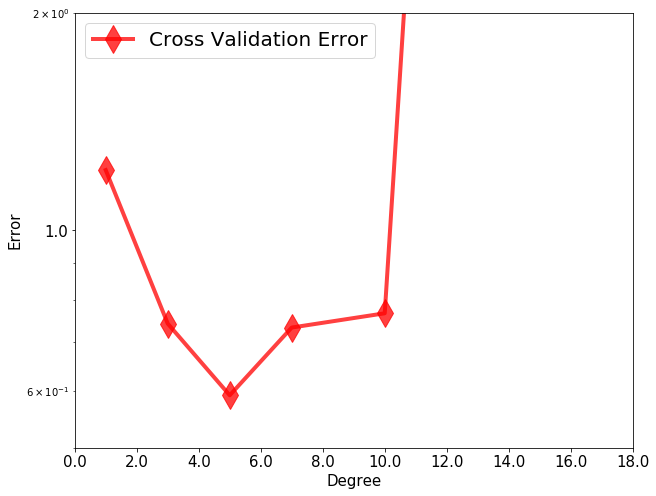

In [20]:
nFolds = 5
degrees = np.array([1, 3, 5, 7, 10, 18])
CVE = np.zeros(degrees.shape[0])
fig,ax=plt.subplots(1,1, figsize=(10, 8))

for i, degree in enumerate(degrees):
    CVE[i] = Crossvalidation(degree,nFolds)
    
ax.semilogy(degrees,CVE,'r-',lw=4, marker='d', markersize=20, alpha=0.75,label='Cross Validation Error')
ax.set_xlim(0,18)
ax.set_ylim(.5,2)
ax.set_xlabel('Degree',fontsize=15 )
ax.set_ylabel('Error',fontsize=15)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   

ax.legend(fontsize=20, loc=0)
plt.show() 

## Problem 2.2

<p>The MSE estimates of the five-fold cross validation data were very similar to the actual MSE's evaluated on the actual test data. Both graphs seemed to follow similar patterns given certain degrees (except degree 5). Both also ran into issues with overfitting when degree reached higher than 10.</p>

## Problem 2.3

<p><b>Recommended Degree: <u>5</u></b></p>

## Problem 2.4

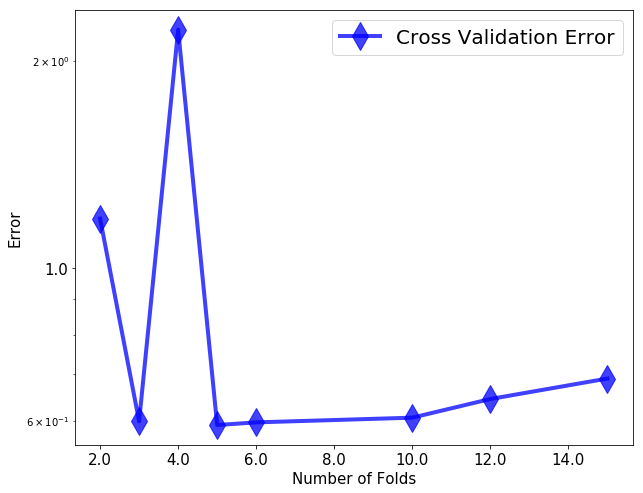

In [21]:
degree = 5
nFolds = np.array([2, 3, 4, 5, 6, 10, 12, 15])
CVE = np.zeros(nFolds.shape[0])
fig,ax=plt.subplots(1,1, figsize=(10, 8))

for i, nFold in enumerate(nFolds):
    CVE[i] = Crossvalidation(degree, nFold)
    
ax.semilogy(nFolds,CVE,'b-',lw=4, marker='d', markersize=20, alpha=0.75, label='Cross Validation Error')
ax.set_xlabel('Number of Folds',fontsize=15)
ax.set_ylabel('Error',fontsize=15)
ax.set_xticklabels(ax.get_xticks(), fontsize=15)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)   

ax.legend(fontsize=20, loc=0)
plt.show() 

<p>I did notice that given a degree, as the number of folds increased, the cross validation error gradually increased as well. I believe this happens because when the number of folds increases, the number of training data also increases while the number of test data decreases. So there's more variance.</p>

# Statement of Collaboration

I collabed with Sergey Kochetov and Chad Lei to discuss different aspects of linear regression and cross validation that we didn't understand from class. For homework assistance I relied on piazza to answer any logistical questions about the given code or any understanding of the code that I needed help on. But the homework was solely worked on my own.